# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
1. There is a positive correlation between mouse weight and tumor size. with a coefficient of .84, it is very close to a true linear correlation.
2. Capomulin and Ramicane were the most effective at reducing tumor size.
3. Looking at Mouse l509 we can see that their tumor shrank in size over time, showing signs of effectiveness.


In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_df=pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [113]:
# Checking the number of mice.
combo_df['Mouse ID'].nunique()

249

In [157]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = combo_df.set_index('Mouse ID')

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 

index_df.loc['g989']


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combo_df.drop_duplicates(['Mouse ID'])

In [117]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggsum= combo_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggsum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


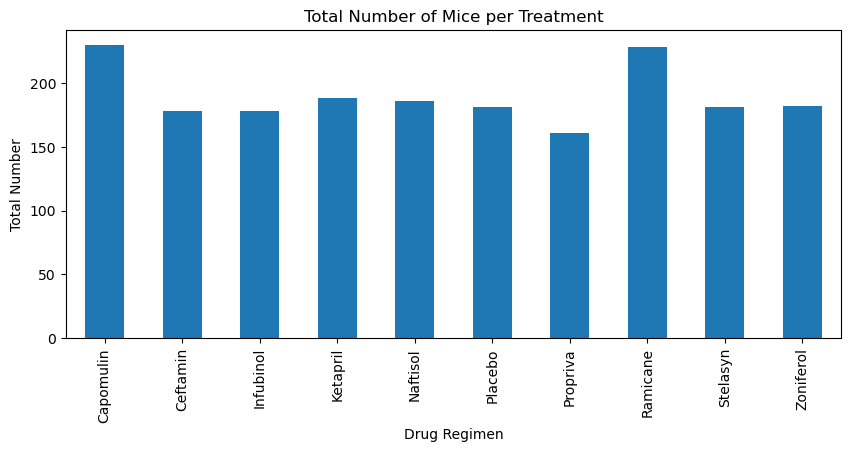

In [120]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bardata = combo_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

bardata.plot(kind="bar", figsize=(10,4))

plt.title('Total Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number')

plt.show()


## Bar and Pie Charts

<function matplotlib.pyplot.legend(*args, **kwargs)>

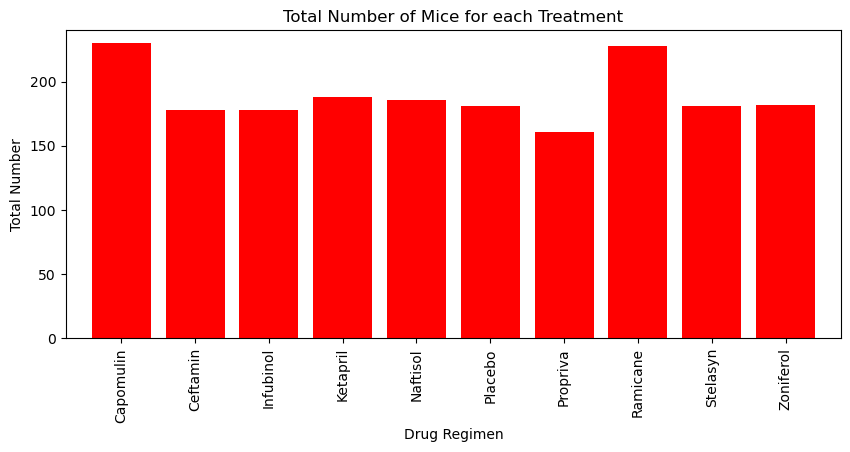

In [121]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=np.arange(len(bardata))
ticks=[value for value in x_axis]
plt.figure(figsize=(10,4))
plt.bar(x_axis,bardata,color='r',alpha=1,align='center')
plt.xticks(ticks,bardata.index.values,rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(bardata)+10)

plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")
plt.legend

<AxesSubplot:ylabel='Sex'>

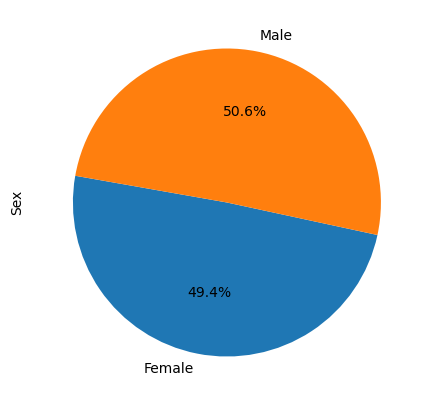

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=combo_df.groupby(['Sex'])['Sex'].count()
sex.plot.pie(startangle=170,autopct='%1.1f%%',figsize=(5,5))

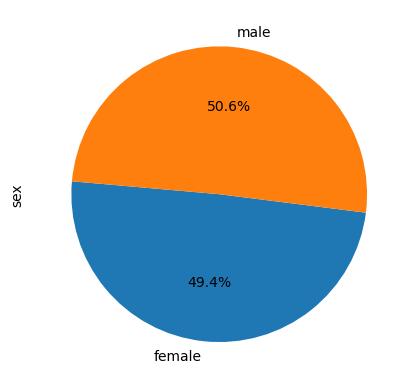

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex,labels=('female','male'),startangle=175,autopct='%1.1f%%')
plt.ylabel('sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttime=combo_df.groupby(['Mouse ID'])['Timepoint'].max()
lasttime_df=pd.DataFrame(lasttime)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_combo_df=pd.merge(combo_df,lasttime_df,on=('Mouse ID','Timepoint'),how='right')
last_combo_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
treats = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap=[]
tumor_ram=[]
tumor_inf=[]
tumor_cef=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for index,row in last_combo_df.iterrows():
        if row ['Drug Regimen']=='Capomulin':
            tumor_cap.append(row['Tumor Volume (mm3)'])
        if row ['Drug Regimen']==treats[1]:
            tumor_ram.append(row['Tumor Volume (mm3)'])
        if row ['Drug Regimen']==treats[2]:
            tumor_inf.append(row['Tumor Volume (mm3)'])
        if row ['Drug Regimen']==treats[3]:
            tumor_cef.append(row['Tumor Volume (mm3)'])    
   
    
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treats[1]: tumor_ram,
                       treats[2]: tumor_inf,
                       treats[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [138]:

for i in range(len(treats)):
    quart = drug_df[treats[i]].quantile([.25, .5, .75])
    lower = quart[.25]
    median = quart[.5]
    upper = quart[.75]
    iqr = upper-lower
    lowerb = lower - (1.5*iqr)
    upperb = upper + (1.5*iqr)
    maximum = drug_df[treats[i]].max()
    minimum = drug_df[treats[i]].min()
    
    outliers = pd.DataFrame({'Drug': [treats[i]],
                         'Lower Quartile':[lower],
                          'Upper Quartile':[upper],
                          'IQR':[iqr],
                          'Median':[median],
                         'Upper Bound': [upperb],
                         'Lower Bound': [lowerb],
                         'Max': [maximum],
                         'Min': [minimum],
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Ceftamin,48.722078,64.29983,15.577752,59.851956,87.666458,25.35545,68.923185,45.0


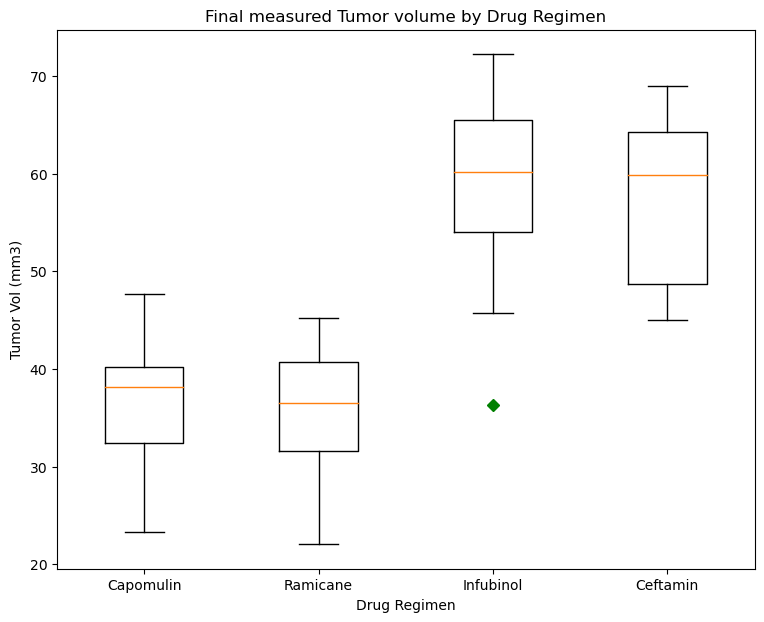

In [140]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_df[treats[0]],
                drug_df[treats[1]],
                drug_df[treats[2]],
                drug_df[treats[3]]
               ]
fig1, ax = plt.subplots(figsize=(9,7))
#creating labels
ax.set_title('Final measured Tumor volume by Drug Regimen') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)') 
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treats) 

plt.show()

## Line and Scatter Plots

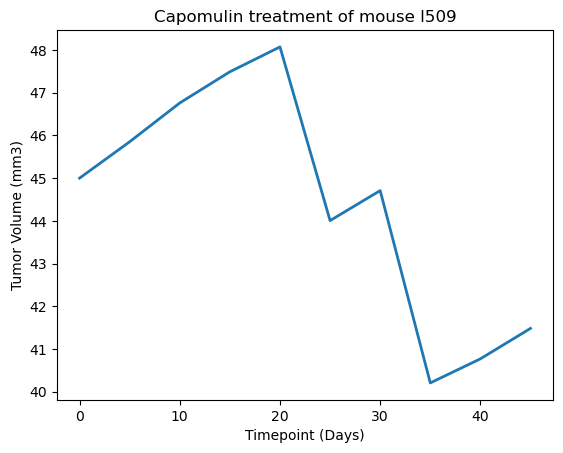

In [143]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df=combo_df.loc[combo_df["Mouse ID"]=="l509",:]
line_df
#create the labels
x_line=line_df['Timepoint']
tumorSize=line_df["Tumor Volume (mm3)"]
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_line,tumorSize,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

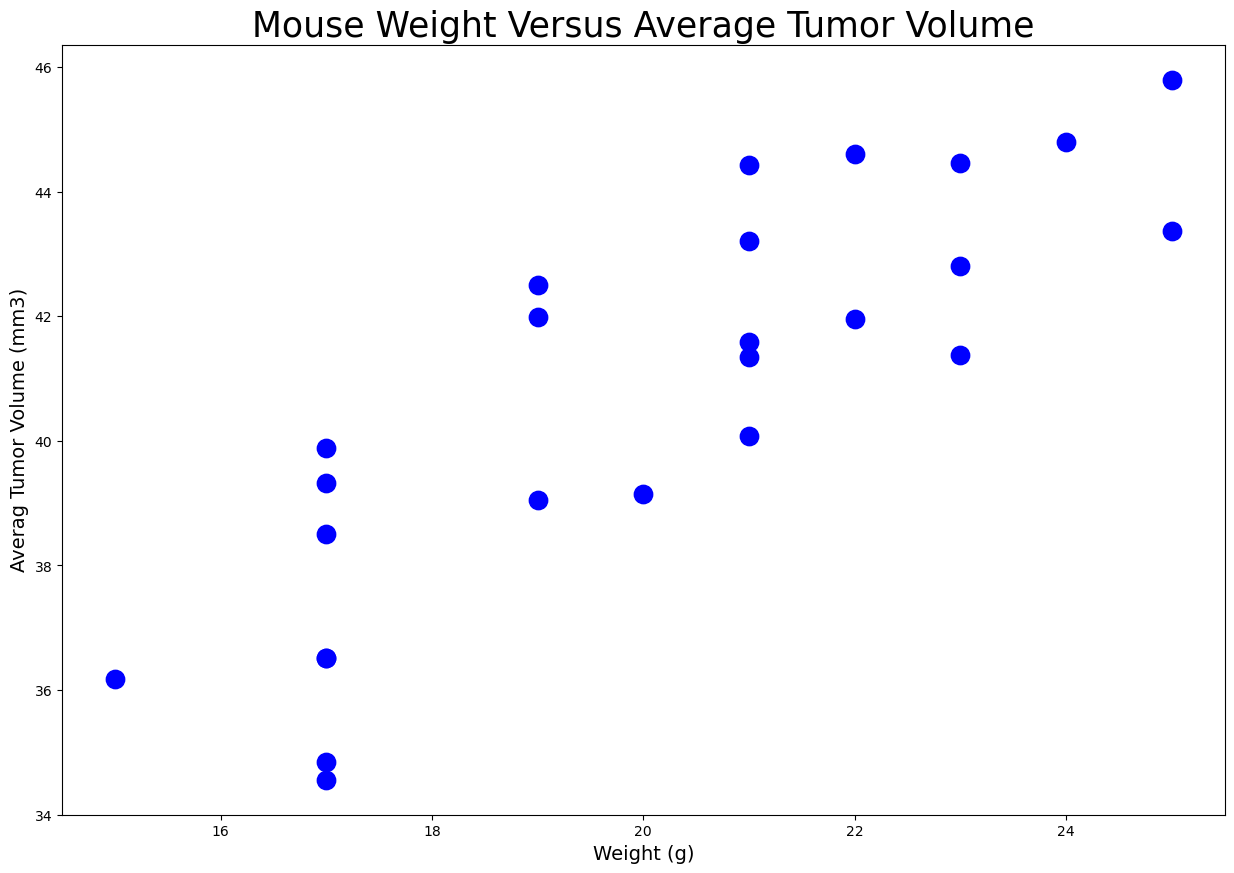

In [151]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
cap_df = combo_df.loc[combo_df["Drug Regimen"] == "Capomulin",:]
avg_capm_vol =cap_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="b")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)

plt.show()


## Correlation and Regression

In [153]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cor=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {cor}")


The correlation between mouse weight and average tumor volume is 0.84
